
## Steps

In this we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Aug  2 05:27:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [3]:
# Pip install method (recommended)
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/166.8 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="36TReUlIDHfsRr7V7V3Y")
project = rf.workspace("kidney-ozy7e").project("instance-segmentation-kyddu")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Instance-Segmentation--1 in yolov8:: 100%|██████████| 3430/3430 [00:01<00:00, 2977.96it/s]


## Custom Training

In [6]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 52.4M/52.4M [00:00<00:00, 140MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Instance-Segmentation--1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [7]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1.jpg
BoxP_curve.png					    train_batch2.jpg
BoxPR_curve.png					    train_batch7740.jpg
BoxR_curve.png					    train_batch7741.jpg
confusion_matrix.png				    train_batch7742.jpg
events.out.tfevents.1690954167.8e064114f164.1136.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


/content


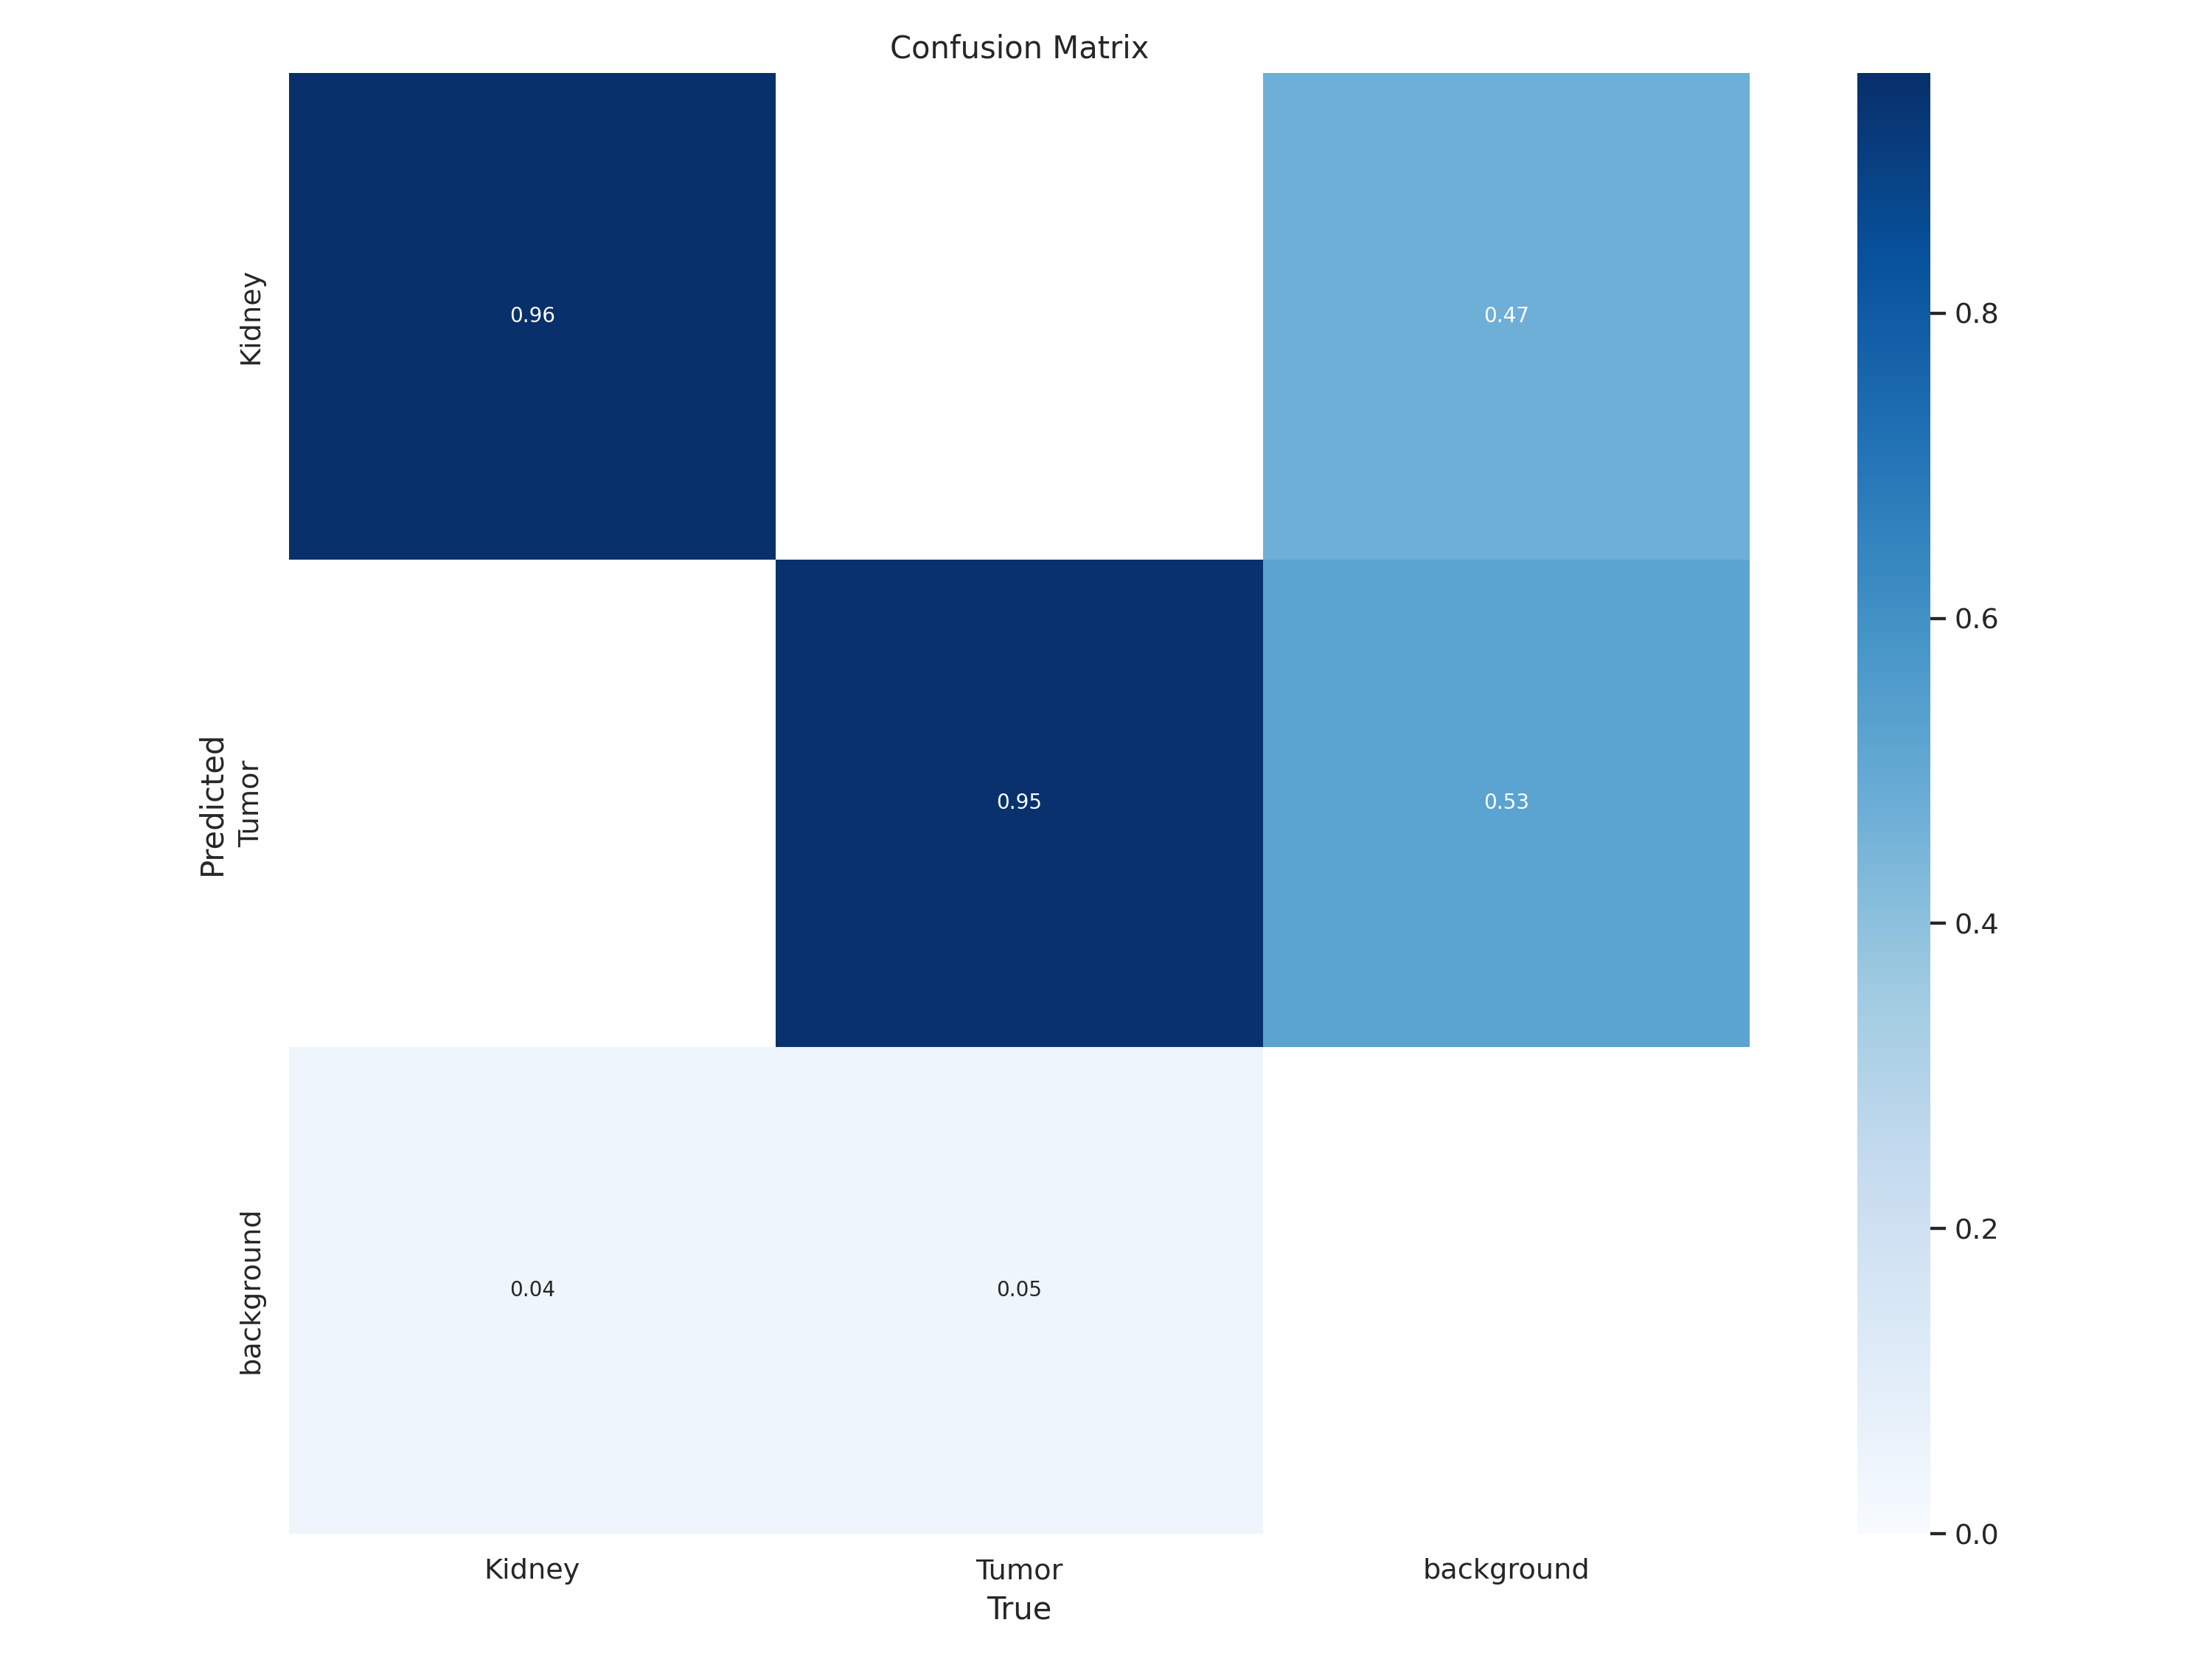

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1000)

/content


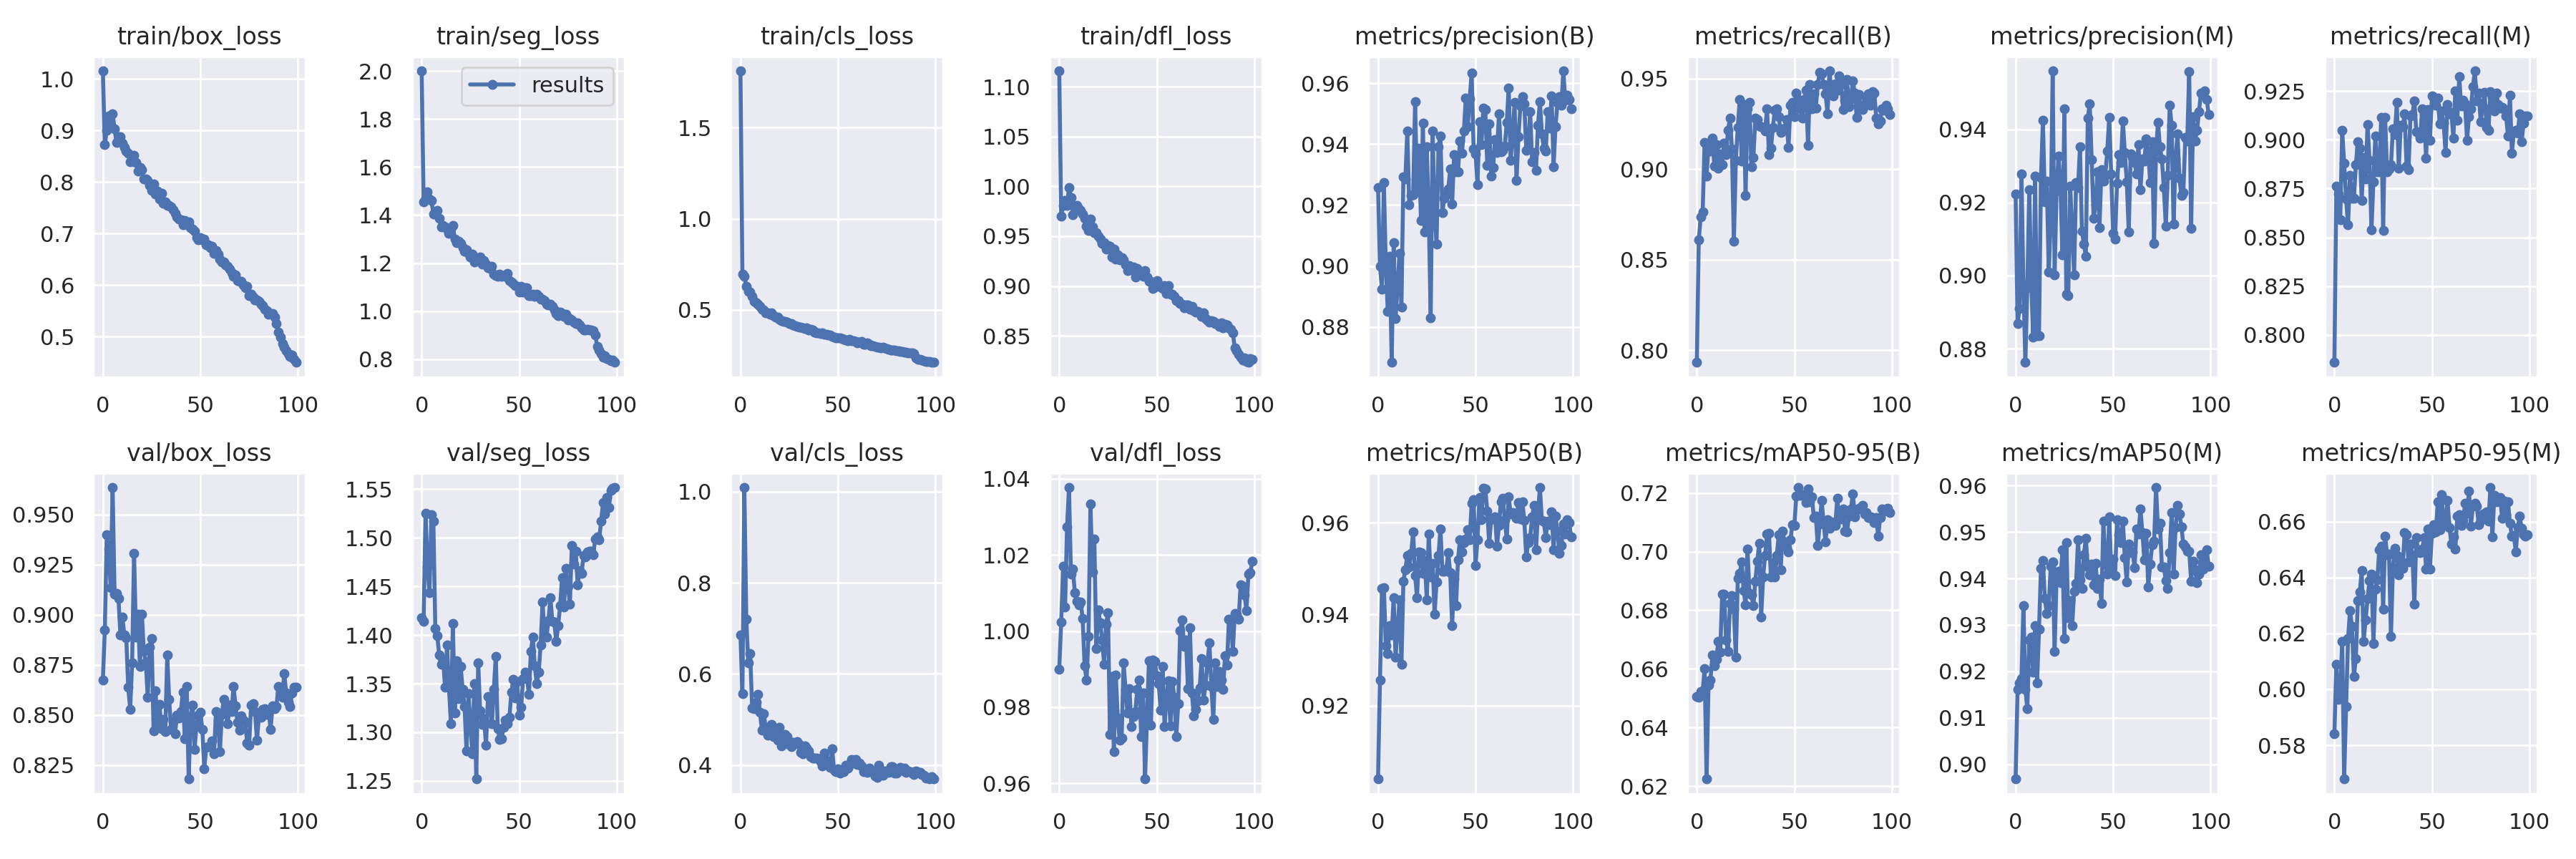

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000,height=300)

/content


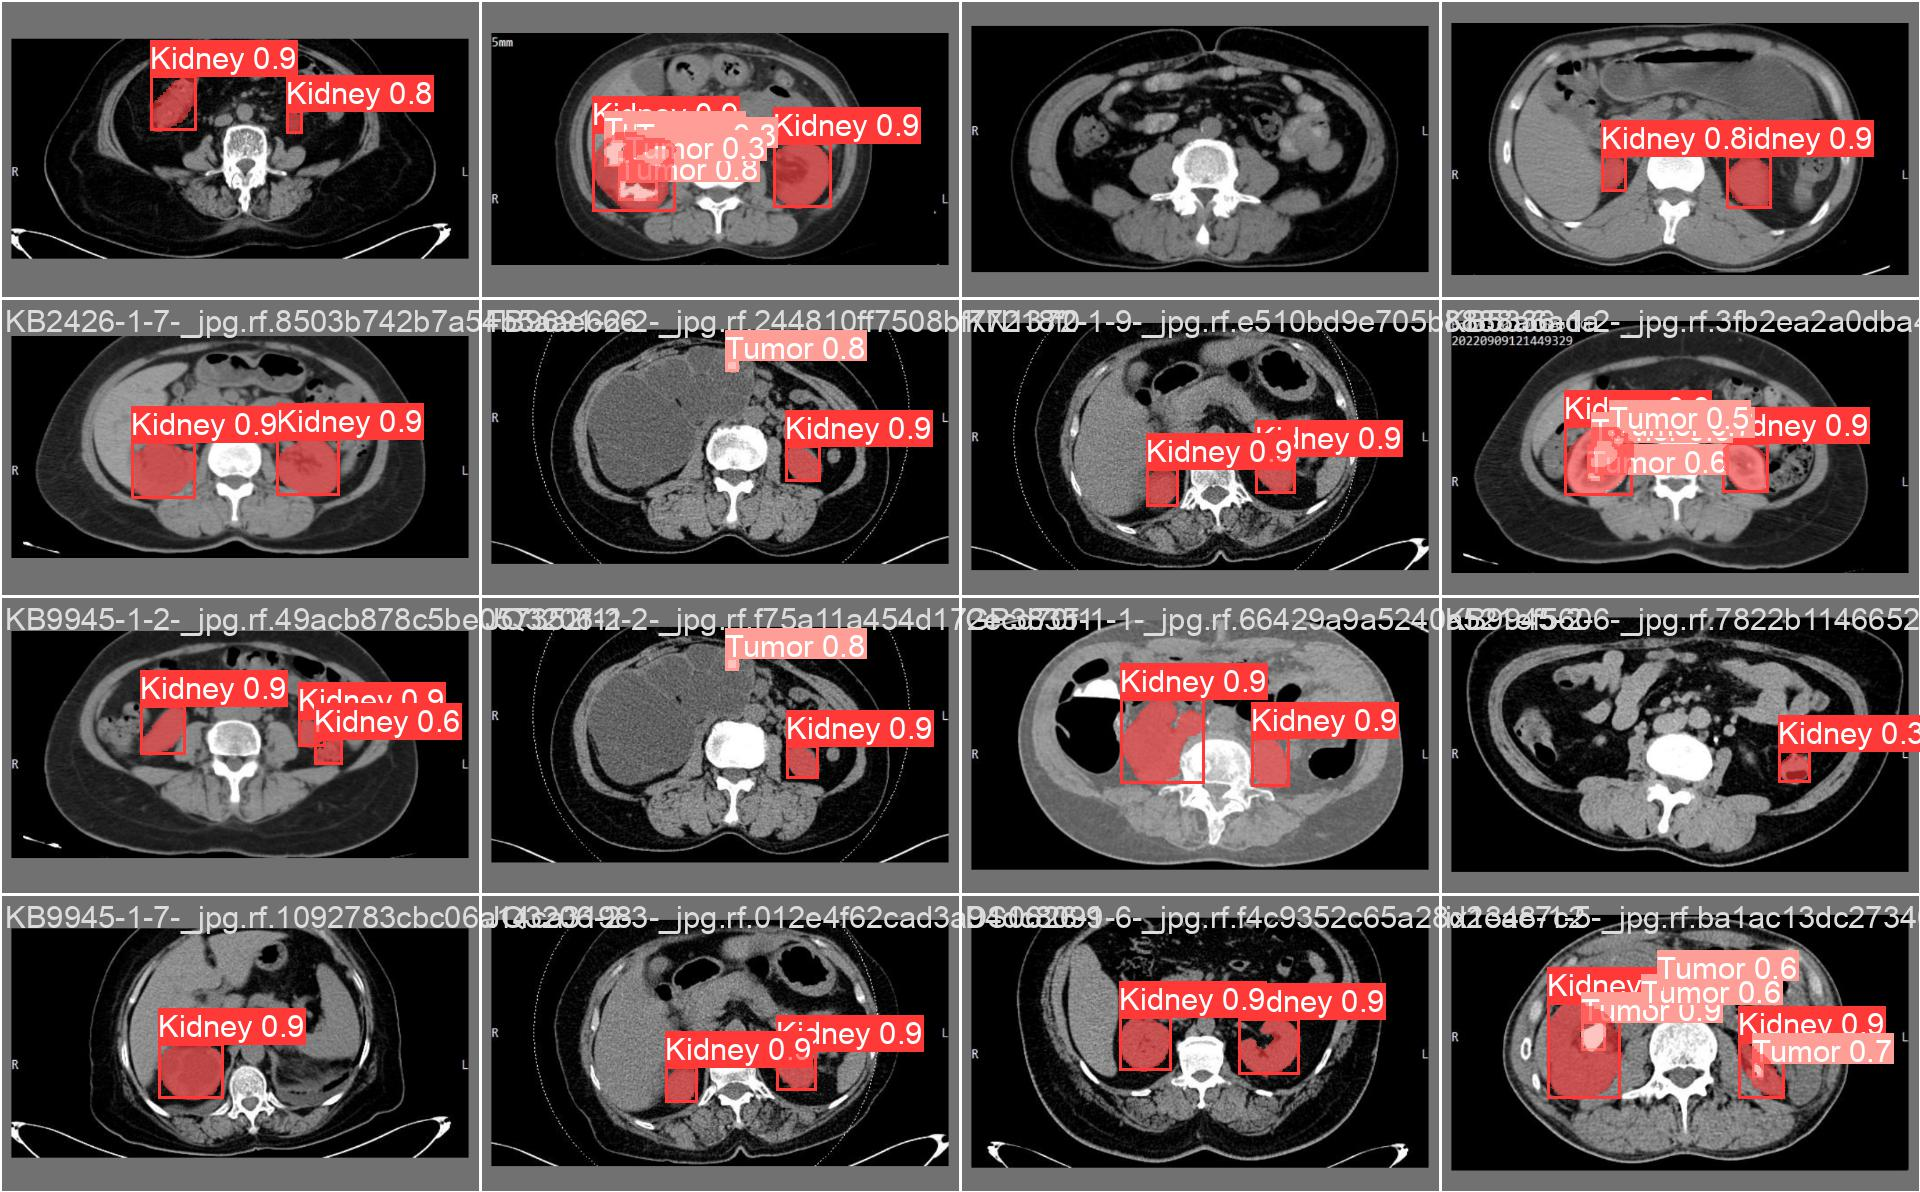

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

/content


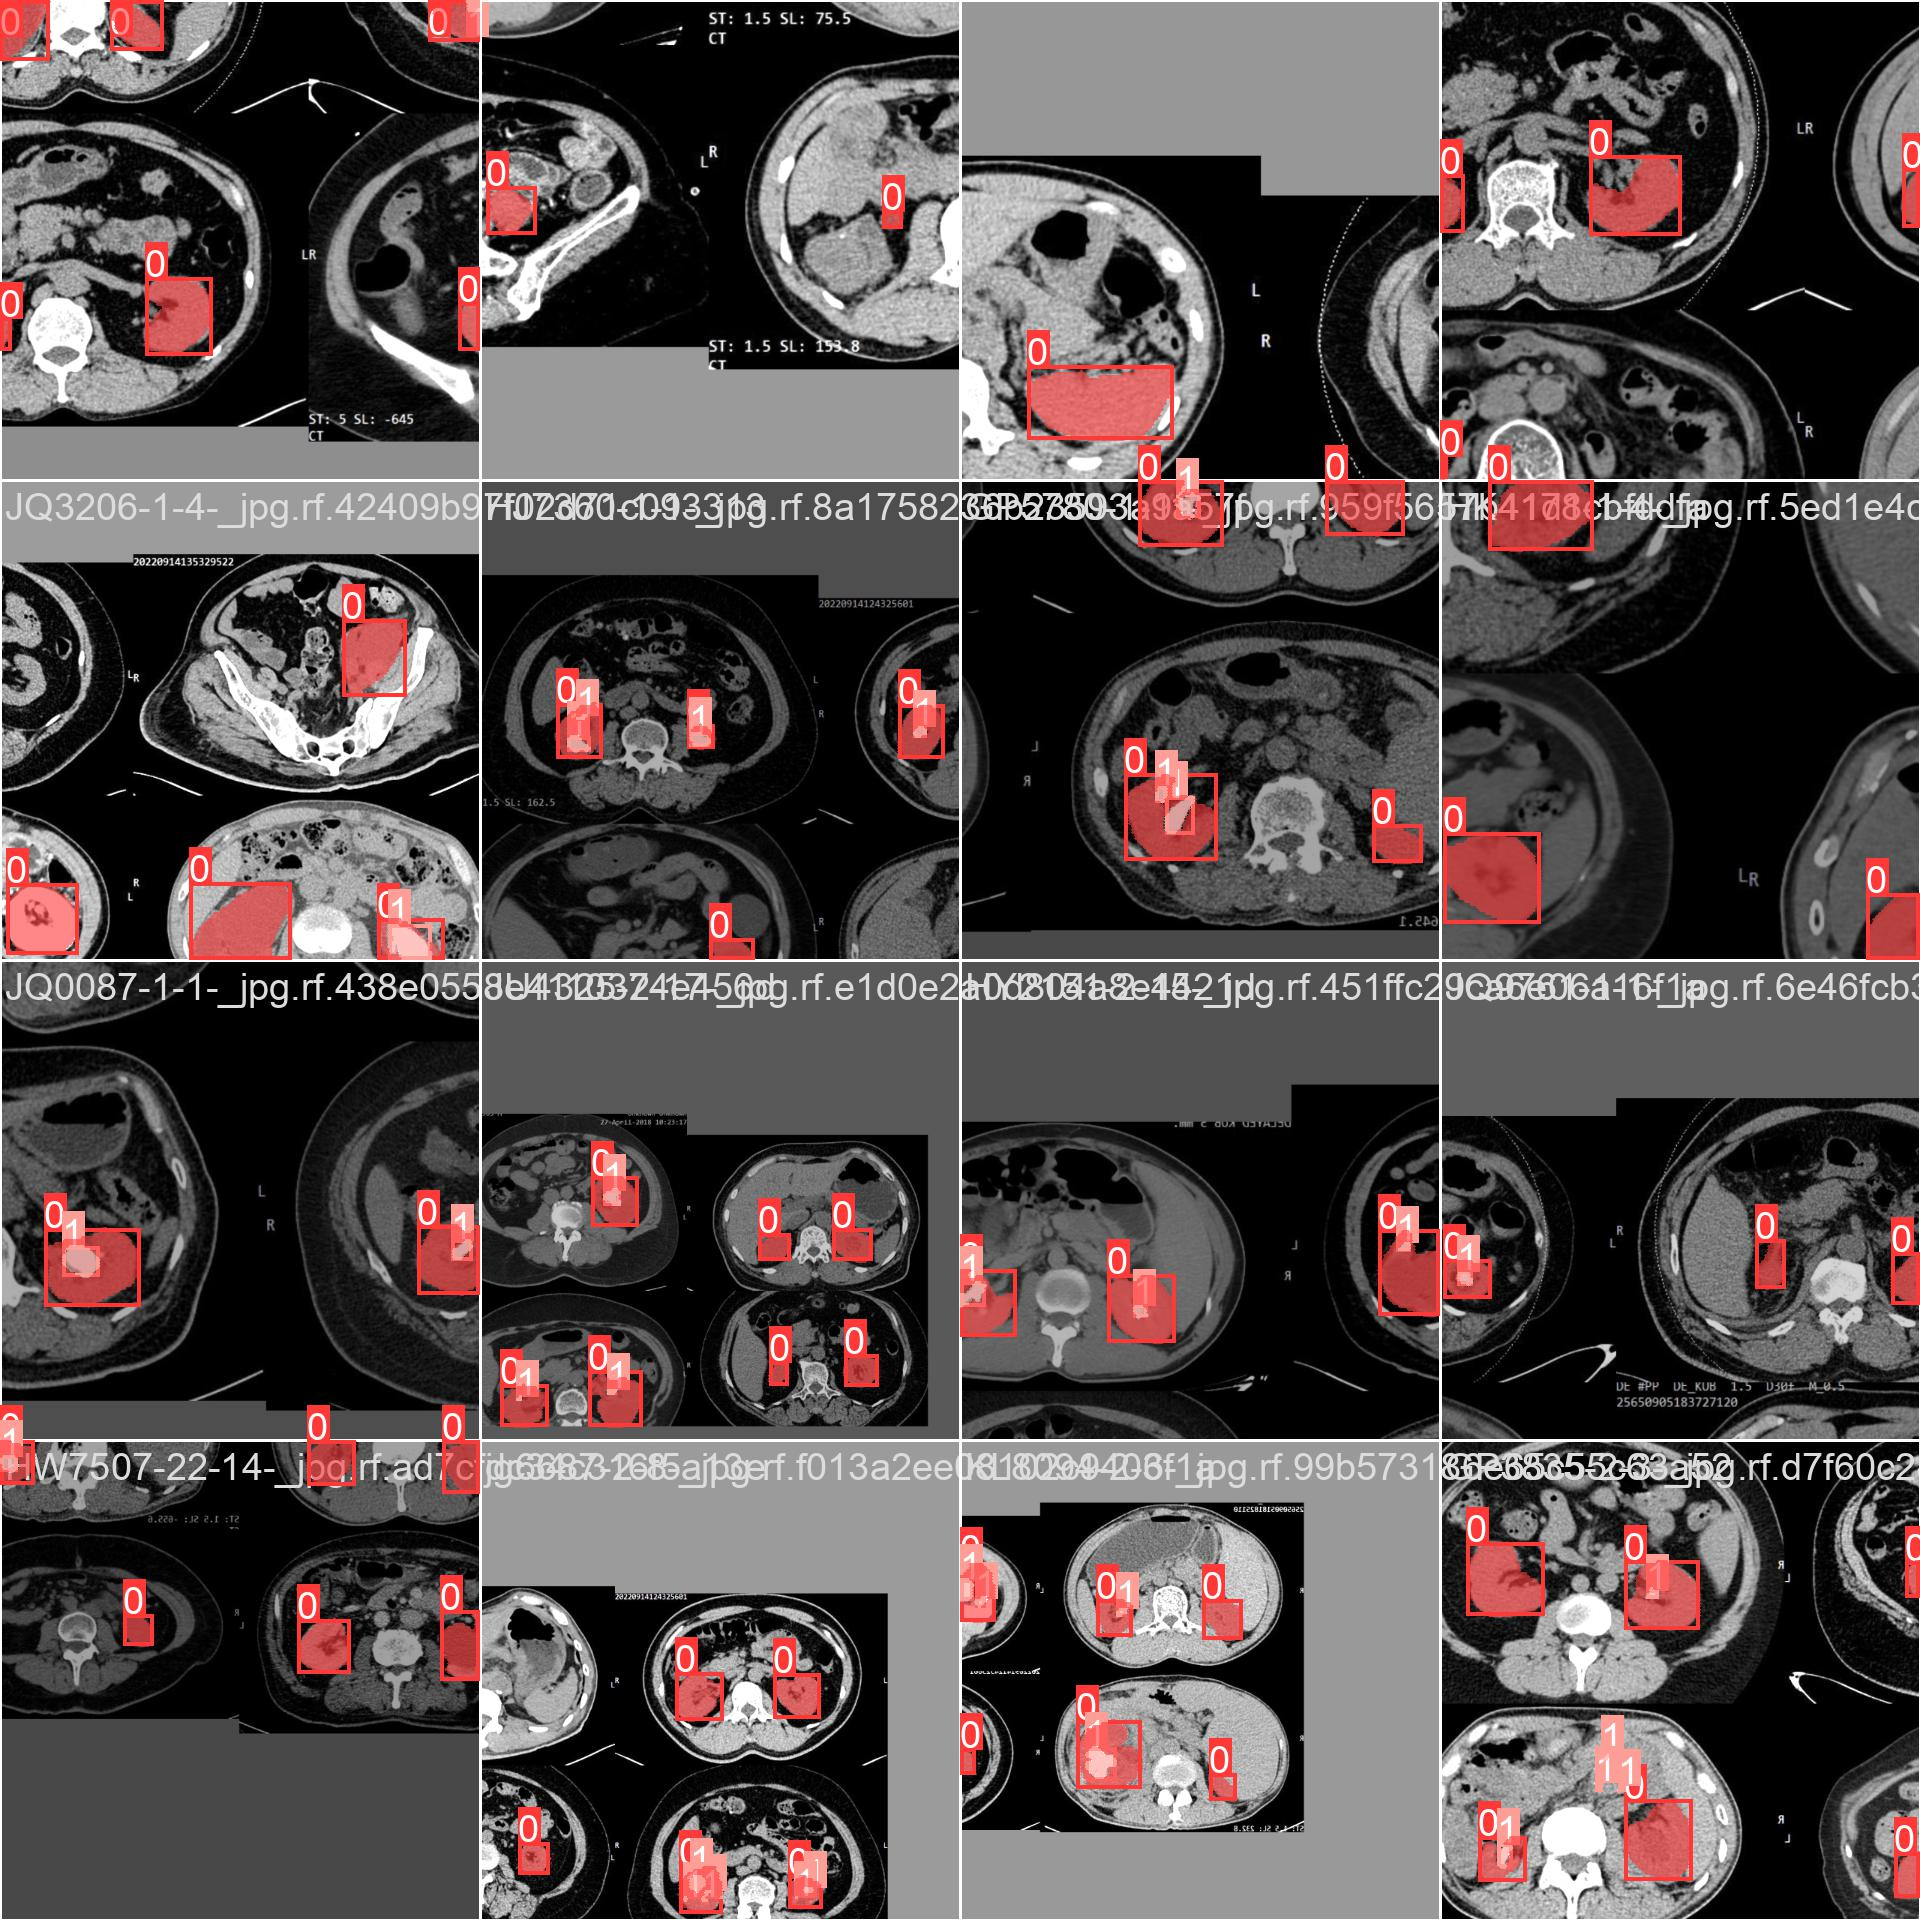

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/train_batch0.jpg', width=1000)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-02 07:30:40.853852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 07:30:42.016307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Instance-Segmentation--1/valid/labels.cache... 170 images, 13 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:08<00:00,  1.36it/s]
                   all        170        432      0.946      0

## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=true

/content
2023-08-02 07:33:36.294892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 07:33:37.194448: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

image 1/172 /content/datasets/Instance-Segmentation--1/test/images/CG7645-11-10-_jpg.rf.9b86f73fbf6a911798b33f8fffd11437.jpg: 480x640 87.4ms
image 2/172 /content/datasets/Instance-Segmentation--1/test/images/CG7645-11-6-_jpg.rf.beea0c27a7efe9d962d0c172594d32f1.jpg: 480x640 2 Kidneys, 34.9ms
image 3/172 /content/datasets/Instance-Segmentation--1/test/images/CG7645-11-7-_jpg.rf.

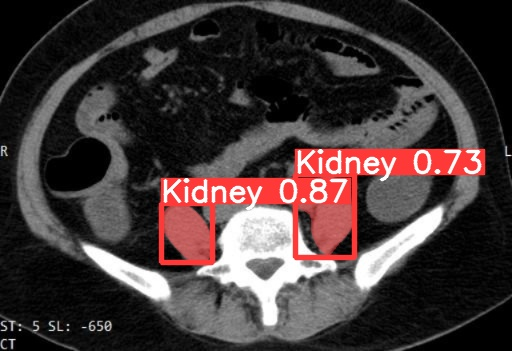

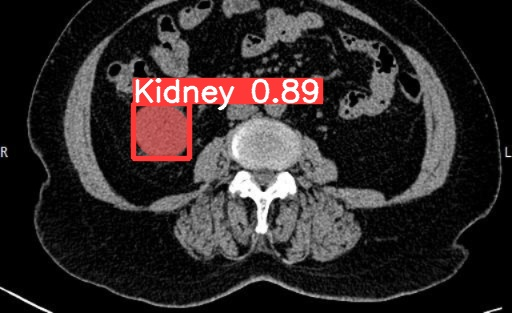

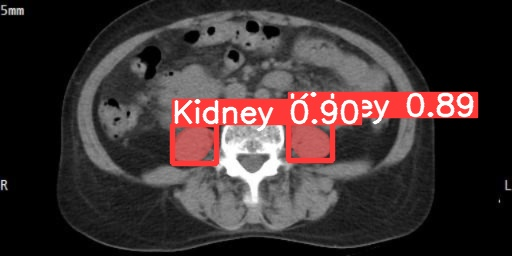

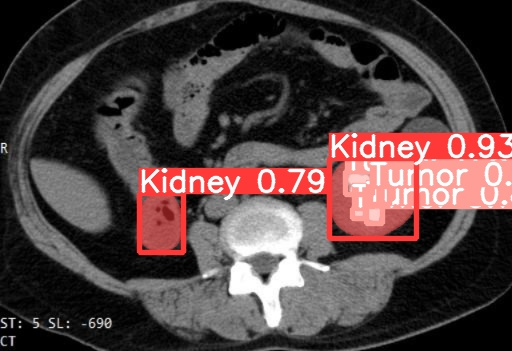

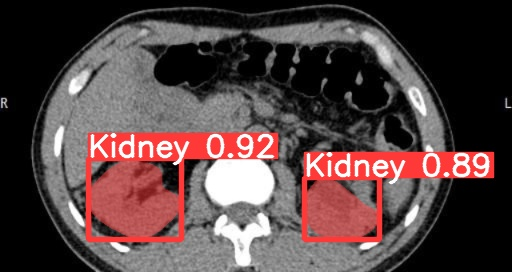

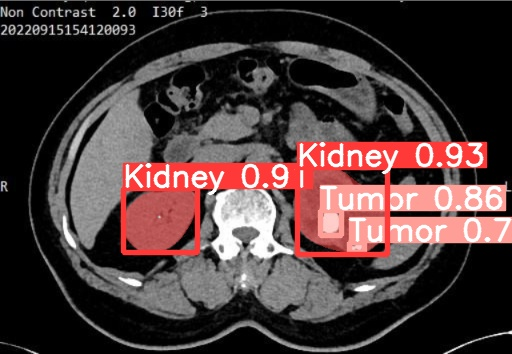

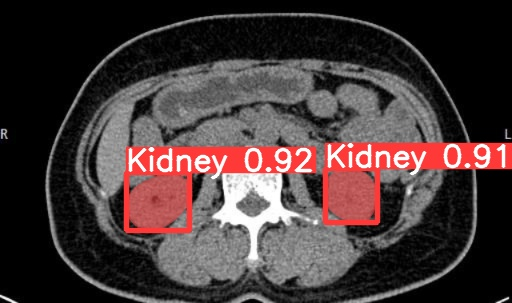

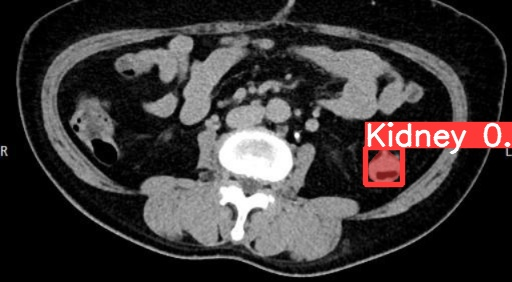

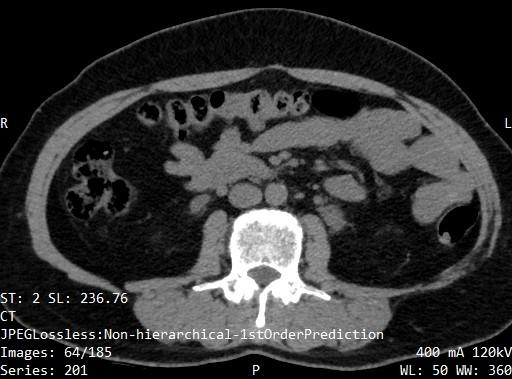

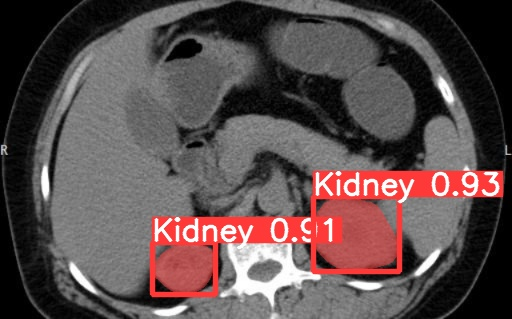

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [22]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("/content/runs/segment/train/weights/best.pt")

# from PIL
im1 = Image.open("/content/datasets/Instance-Segmentation--1/test/images/HY2151-2-8-_jpg.rf.dd3bd76e00b6fa26c79c2edef1531549.jpg")
results = model.predict(source=im1,show=True,hide_conf=True)  # save plotted images

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

0: 448x640 2 Kidneys, 1 Tumor, 81.2ms
Speed: 0.6ms pre-process, 81.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.

image 1/1 /content/datasets/Instance-Segmentation--1/test/images/HY2151-2-8-_jpg.rf.dd3bd76e00b6fa26c79c2edef1531549.jpg: 448x640 2 Kidneys, 1 Tumor, 224.8ms
Speed: 8.4ms preprocess, 224.8ms inference, 9.5ms postprocess per image at shape (1, 3, 448, 640)


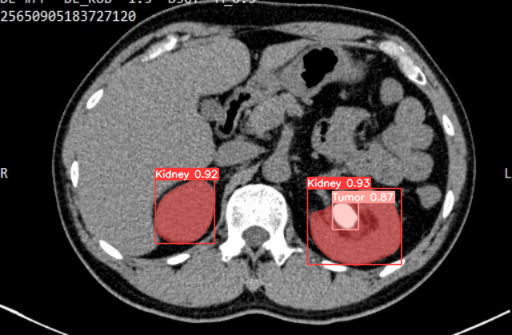

In [2]:
from google.colab.patches import cv2_imshow

from ultralytics import YOLO
from PIL import Image
import cv2

model=YOLO('/content/runs/segment/train/weights/best.pt')
results = model('/content/datasets/Instance-Segmentation--1/test/images/HY2151-2-8-_jpg.rf.dd3bd76e00b6fa26c79c2edef1531549.jpg')
res_plotted = results[0].plot(line_width=1,labels=True)
cv2_imshow(res_plotted)

In [25]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.28
    Uninstalling ultralytics-8.0.28:
      Successfully uninstalled ultralytics-8.0.28
